# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
dsjobs = pd.read_csv('ds_salaries.csv')
dsjobs = dsjobs.drop(columns=['Unnamed: 0'])
dsjobs.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
379,2022,SE,FT,Data Architect,147800,USD,147800,US,100,US,M
596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
430,2022,MI,FT,Data Analyst,40000,EUR,43966,ES,100,ES,M
113,2021,EN,PT,AI Scientist,12000,USD,12000,PK,100,US,M
214,2021,EN,FT,Machine Learning Engineer,21000,EUR,24823,DE,50,DE,M


In [3]:
dsjobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [4]:
dsjobs['salary_in_IDR'] = dsjobs['salary_in_usd']*15110
dsjobs.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_IDR
34,2020,MI,FT,Data Analyst,41000,EUR,46759,FR,50,FR,L,706528490
202,2021,MI,FT,Data Scientist,32000,EUR,37825,ES,100,ES,L,571535750
528,2022,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M,1511000000
247,2021,MI,FT,Data Engineer,108000,TRY,12103,TR,0,TR,M,182876330
569,2022,SE,FT,Data Scientist,140000,USD,140000,US,100,US,M,2115400000
411,2022,MI,FT,Data Scientist,35000,GBP,45807,GB,0,GB,M,692143770
591,2022,SE,FT,Data Architect,144854,USD,144854,US,100,US,M,2188743940
50,2020,EN,FT,Data Analyst,450000,INR,6072,IN,0,IN,S,91747920
566,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M,2568700000
512,2022,EN,FT,Data Engineer,65000,USD,65000,US,100,US,S,982150000


# Check Missing Values

In [5]:
dsjobs.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary_in_IDR         0
dtype: int64

# Duplicate Rows Handling

In [6]:
dsjobs.duplicated().sum()

42

In [7]:
dsjobs = dsjobs.drop_duplicates()
dsjobs.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_IDR
337,2022,SE,FT,Data Engineer,243900,USD,243900,US,100,US,M,3685329000
258,2021,SE,FT,Machine Learning Engineer,185000,USD,185000,US,50,US,L,2795350000
247,2021,MI,FT,Data Engineer,108000,TRY,12103,TR,0,TR,M,182876330
401,2022,SE,FT,Data Engineer,154600,USD,154600,US,100,US,L,2336006000
249,2021,SE,FT,Principal Data Analyst,170000,USD,170000,US,100,US,M,2568700000


In [8]:
for column in dsjobs.columns:
    print(f"============= {column} =================")
    display(dsjobs[column].value_counts())
    print()

============= work_year =================


2022    278
2021    215
2020     72
Name: work_year, dtype: int64


============= experience_level =================


SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64


============= employment_type =================


FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


============= job_title =================


Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            


============= salary =================


80000      18
100000     16
120000     15
60000      14
150000     14
           ..
39600       1
1335000     1
52500       1
31000       1
129000      1
Name: salary, Length: 272, dtype: int64


============= salary_currency =================


USD    359
EUR     93
GBP     43
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64


============= salary_in_usd =================


100000    13
150000    12
120000    12
200000     9
80000      8
          ..
74000      1
61896      1
26005      1
90734      1
129000     1
Name: salary_in_usd, Length: 369, dtype: int64


============= employee_residence =================


US    295
GB     43
IN     30
CA     27
DE     24
FR     18
ES     15
GR     12
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64


============= remote_ratio =================


100    346
0      121
50      98
Name: remote_ratio, dtype: int64


============= company_location =================


US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64


============= company_size =================


M    290
L    193
S     82
Name: company_size, dtype: int64


============= salary_in_IDR =================


1511000000    13
2266500000    12
1813200000    12
3022000000     9
1208800000     8
              ..
1118140000     1
935248560      1
392935550      1
1370990740     1
1949190000     1
Name: salary_in_IDR, Length: 369, dtype: int64

# Label Encoding

In [9]:
def experience_level(x):
    if x == 'EN':
        return 'Entry Level'
    elif x== 'MI':
        return 'Mid Level'
    elif x == 'SE':
        return 'Senior Level'
    elif x == 'EX':
        return 'Executive Level'
    else: 
        return 'No Level'

In [10]:
dsjobs['experience_level'] = dsjobs['experience_level'].apply(experience_level)

In [11]:
dsjobs.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_IDR
602,2022,Senior Level,FT,Data Engineer,154000,USD,154000,US,100,US,M,2326940000
603,2022,Senior Level,FT,Data Engineer,126000,USD,126000,US,100,US,M,1903860000
604,2022,Senior Level,FT,Data Analyst,129000,USD,129000,US,0,US,M,1949190000
605,2022,Senior Level,FT,Data Analyst,150000,USD,150000,US,100,US,M,2266500000
606,2022,Mid Level,FT,AI Scientist,200000,USD,200000,IN,100,US,L,3022000000


In [12]:
def employment_type(x):
    if x == 'PT':
        return 'Part-time'
    elif x== 'FT':
        return 'Full-time'
    elif x == 'CT':
        return 'Contract'
    elif x == 'FL':
        return 'Freelance'
    else: 
        return 'No Time'
    

def company_size(x):
    if x == 'S':
        return '< 50 Karyawan'
    elif x== 'M':
        return '50 - 250 Karyawan'
    elif x == 'L':
        return '250 > Karyawan'
    else: 
        return 'No Size'

In [13]:
dsjobs['employment_type'] = dsjobs['employment_type'].apply(employment_type)
dsjobs['company_size'] = dsjobs['company_size'].apply(company_size)
dsjobs.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_IDR
200,2021,Mid Level,Full-time,Data Scientist,52000,EUR,61467,DE,50,AT,50 - 250 Karyawan,928766370
283,2021,Senior Level,Contract,Staff Data Scientist,105000,USD,105000,US,100,US,50 - 250 Karyawan,1586550000
237,2021,Mid Level,Full-time,Data Scientist,39600,EUR,46809,ES,100,ES,50 - 250 Karyawan,707283990
117,2021,Mid Level,Full-time,Data Science Engineer,34000,EUR,40189,GR,100,GR,50 - 250 Karyawan,607255790
201,2021,Senior Level,Full-time,Machine Learning Infrastructure Engineer,195000,USD,195000,US,100,US,50 - 250 Karyawan,2946450000
591,2022,Senior Level,Full-time,Data Architect,144854,USD,144854,US,100,US,50 - 250 Karyawan,2188743940
567,2022,Mid Level,Full-time,Data Analyst,50000,GBP,65438,GB,0,GB,50 - 250 Karyawan,988768180
8,2020,Mid Level,Full-time,Business Data Analyst,135000,USD,135000,US,100,US,250 > Karyawan,2039850000
211,2021,Mid Level,Full-time,Research Scientist,48000,EUR,56738,FR,50,FR,< 50 Karyawan,857311180
78,2021,Mid Level,Contract,ML Engineer,270000,USD,270000,US,100,US,250 > Karyawan,4079700000


In [14]:
#buat Database
def IDexperience(x):
    if x == 'Entry Level':
        return 'EX001'
    elif x== 'Mid Level':
        return 'EX002'
    elif x == 'Senior Level':
        return 'EX003'
    elif x == 'Executive Level':
        return 'EX004'
    else: 
        return 'No Level'

def IDemployment(x):
    if x == 'Part-time':
        return 'ET001'
    elif x== 'Full-time':
        return 'ET002'
    elif x == 'Contract':
        return 'ET003'
    elif x == 'Freelance':
        return 'ET004'
    else: 
        return 'No Time'

In [15]:
dsjobs['IDexperience'] = dsjobs['experience_level'].apply(IDexperience)
dsjobs['IDemployment'] = dsjobs['employment_type'].apply(IDemployment)
dsjobs = dsjobs.rename(columns={'salary_in_usd':'salary_in_USD'})
dsjobs.sample(10)
#data.to_excel('Super_Market_sales.xlsx', index=False)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_USD,employee_residence,remote_ratio,company_location,company_size,salary_in_IDR,IDexperience,IDemployment
468,2022,Senior Level,Full-time,Data Engineer,100000,USD,100000,US,100,US,50 - 250 Karyawan,1511000000,EX003,ET002
255,2021,Senior Level,Full-time,Big Data Architect,125000,CAD,99703,CA,50,CA,50 - 250 Karyawan,1506512330,EX003,ET002
237,2021,Mid Level,Full-time,Data Scientist,39600,EUR,46809,ES,100,ES,50 - 250 Karyawan,707283990,EX002,ET002
240,2021,Senior Level,Full-time,Data Scientist,130000,CAD,103691,CA,100,CA,250 > Karyawan,1566771010,EX003,ET002
106,2021,Mid Level,Full-time,Research Scientist,235000,CAD,187442,CA,100,CA,250 > Karyawan,2832248620,EX002,ET002
215,2021,Senior Level,Full-time,Principal Data Engineer,185000,USD,185000,US,100,US,250 > Karyawan,2795350000,EX003,ET002
44,2020,Mid Level,Full-time,Data Engineer,88000,GBP,112872,GB,50,GB,250 > Karyawan,1705495920,EX002,ET002
281,2021,Entry Level,Full-time,Research Scientist,100000,USD,100000,JE,0,CN,250 > Karyawan,1511000000,EX001,ET002
32,2020,Senior Level,Full-time,Data Scientist,60000,EUR,68428,GR,100,US,250 > Karyawan,1033947080,EX003,ET002
142,2021,Senior Level,Full-time,Data Engineering Manager,150000,USD,150000,US,0,US,250 > Karyawan,2266500000,EX003,ET002


In [16]:
dsjobs[dsjobs.isin(['Contract']).any(axis=1)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_USD,employee_residence,remote_ratio,company_location,company_size,salary_in_IDR,IDexperience,IDemployment
28,2020,Entry Level,Contract,Business Data Analyst,100000,USD,100000,US,100,US,250 > Karyawan,1511000000,EX001,ET003
78,2021,Mid Level,Contract,ML Engineer,270000,USD,270000,US,100,US,250 > Karyawan,4079700000,EX002,ET003
225,2021,Executive Level,Contract,Principal Data Scientist,416000,USD,416000,US,100,US,< 50 Karyawan,6285760000,EX004,ET003
283,2021,Senior Level,Contract,Staff Data Scientist,105000,USD,105000,US,100,US,50 - 250 Karyawan,1586550000,EX003,ET003
489,2022,Entry Level,Contract,Applied Machine Learning Scientist,29000,EUR,31875,TN,100,CZ,50 - 250 Karyawan,481631250,EX001,ET003


In [17]:
dsjobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_USD       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
 11  salary_in_IDR       565 non-null    int64 
 12  IDexperience        565 non-null    object
 13  IDemployment        565 non-null    object
dtypes: int64(5), object(9)
memory usage: 66.2+ KB


In [18]:
dsjobs = dsjobs[['IDexperience','experience_level','IDemployment','employment_type','job_title','salary','salary_currency',
        'salary_in_USD','salary_in_IDR','work_year','employee_residence','remote_ratio','company_location','company_size']]
dsjobs.sample(5)

,IDexperience,experience_level,IDemployment,employment_type,job_title,salary,salary_currency,salary_in_USD,salary_in_IDR,work_year,employee_residence,remote_ratio,company_location,company_size
426,EX003,Senior Level,ET002,Full-time,Data Engineer,100800,USD,100800,1523088000,2022,US,100,US,250 > Karyawan
58,EX003,Senior Level,ET002,Full-time,Data Scientist,120000,USD,120000,1813200000,2020,US,50,US,250 > Karyawan
573,EX003,Senior Level,ET002,Full-time,Data Analyst,69000,USD,69000,1042590000,2022,US,100,US,50 - 250 Karyawan
568,EX003,Senior Level,ET002,Full-time,Data Analyst,80000,USD,80000,1208800000,2022,US,100,US,50 - 250 Karyawan
474,EX002,Mid Level,ET002,Full-time,Data Scientist,140000,GBP,183228,2768575080,2022,GB,0,GB,50 - 250 Karyawan


# Exploratory Data Analysis (EDA)

In [19]:
dsjobs.groupby(['job_title','experience_level'])['salary_in_IDR'].mean().unstack().sample(10)

experience_level,Entry Level,Executive Level,Mid Level,Senior Level
job_title,,,,
Head of Machine Learning,NaN,1.194279e+09,NaN,NaN
Lead Data Analyst,NaN,NaN,8.054310e+08,2.568700e+09
Computer Vision Engineer,8.240440e+08,NaN,NaN,5.183083e+08
3D Computer Vision Researcher,NaN,NaN,8.172999e+07,NaN
Lead Data Scientist,NaN,NaN,1.737650e+09,1.741956e+09
Financial Data Analyst,1.511000e+09,NaN,6.799500e+09,NaN
Staff Data Scientist,NaN,NaN,NaN,1.586550e+09
AI Scientist,3.322273e+08,NaN,2.417600e+09,8.310500e+08
Computer Vision Software Engineer,1.662100e+09,NaN,1.446722e+09,NaN


<AxesSubplot:>

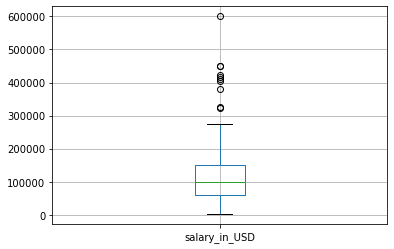

In [20]:
dsjobs.boxplot('salary_in_USD')

# Target

In [21]:
dsjobs.groupby(['job_title','company_size'])['salary_in_USD'].max().to_frame().head(10)

salary_in_USD
job_title                          company_size                    
3D Computer Vision Researcher      50 - 250 Karyawan           5409
AI Scientist                       250 > Karyawan            200000
                                   50 - 250 Karyawan         120000
                                   < 50 Karyawan              45896
Analytics Engineer                 50 - 250 Karyawan         205300
Applied Data Scientist             250 > Karyawan            380000
Applied Machine Learning Scientist 250 > Karyawan            423000
                                   50 - 250 Karyawan          38400
BI Data Analyst                    250 > Karyawan            150000
                                   50 - 250 Karyawan         100000

In [22]:
dsjobs.groupby(['job_title','experience_level'])['salary_in_USD'].max().to_frame().head(10)

salary_in_USD
job_title                          experience_level               
3D Computer Vision Researcher      Mid Level                  5409
AI Scientist                       Entry Level               45896
                                   Mid Level                200000
                                   Senior Level              55000
Analytics Engineer                 Executive Level          175000
                                   Senior Level             205300
Applied Data Scientist             Entry Level              110037
                                   Mid Level                157000
                                   Senior Level             380000
Applied Machine Learning Scientist Entry Level               31875

In [23]:
dsjobs.groupby(['job_title','employment_type'])['salary_in_USD'].max().to_frame().head(10)

salary_in_USD
job_title                          employment_type               
3D Computer Vision Researcher      Part-time                 5409
AI Scientist                       Full-time               200000
                                   Part-time                12000
Analytics Engineer                 Full-time               205300
Applied Data Scientist             Full-time               380000
Applied Machine Learning Scientist Contract                 31875
                                   Full-time               423000
BI Data Analyst                    Full-time               150000
Big Data Architect                 Full-time                99703
Big Data Engineer                  Full-time               114047

# Categoric

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


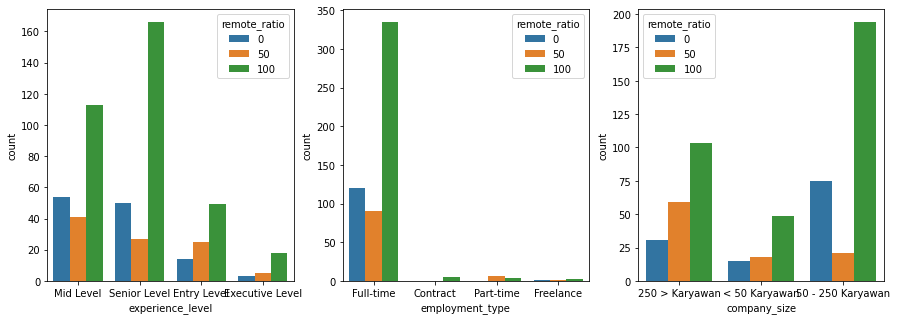

In [24]:
cat_var = ['experience_level', 'employment_type', 'company_size']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=dsjobs, hue='remote_ratio', ax=ax)

In [25]:
dsjobs.sample(5)

,IDexperience,experience_level,IDemployment,employment_type,job_title,salary,salary_currency,salary_in_USD,salary_in_IDR,work_year,employee_residence,remote_ratio,company_location,company_size
175,EX003,Senior Level,ET002,Full-time,Data Engineering Manager,174000,USD,174000,2629140000,2021,US,100,US,250 > Karyawan
35,EX002,Mid Level,ET002,Full-time,Data Engineer,65000,EUR,74130,1120104300,2020,AT,50,AT,250 > Karyawan
468,EX003,Senior Level,ET002,Full-time,Data Engineer,100000,USD,100000,1511000000,2022,US,100,US,50 - 250 Karyawan
510,EX001,Entry Level,ET002,Full-time,Computer Vision Software Engineer,150000,USD,150000,2266500000,2022,AU,100,AU,< 50 Karyawan
77,EX002,Mid Level,ET001,Part-time,3D Computer Vision Researcher,400000,INR,5409,81729990,2021,IN,50,IN,50 - 250 Karyawan


In [26]:
#dsjobs.to_excel('Data Science Jobs.xlsx', index=False)